# CNN

Let's train the ResNet-20 model on CIFAR10 using the following Block.

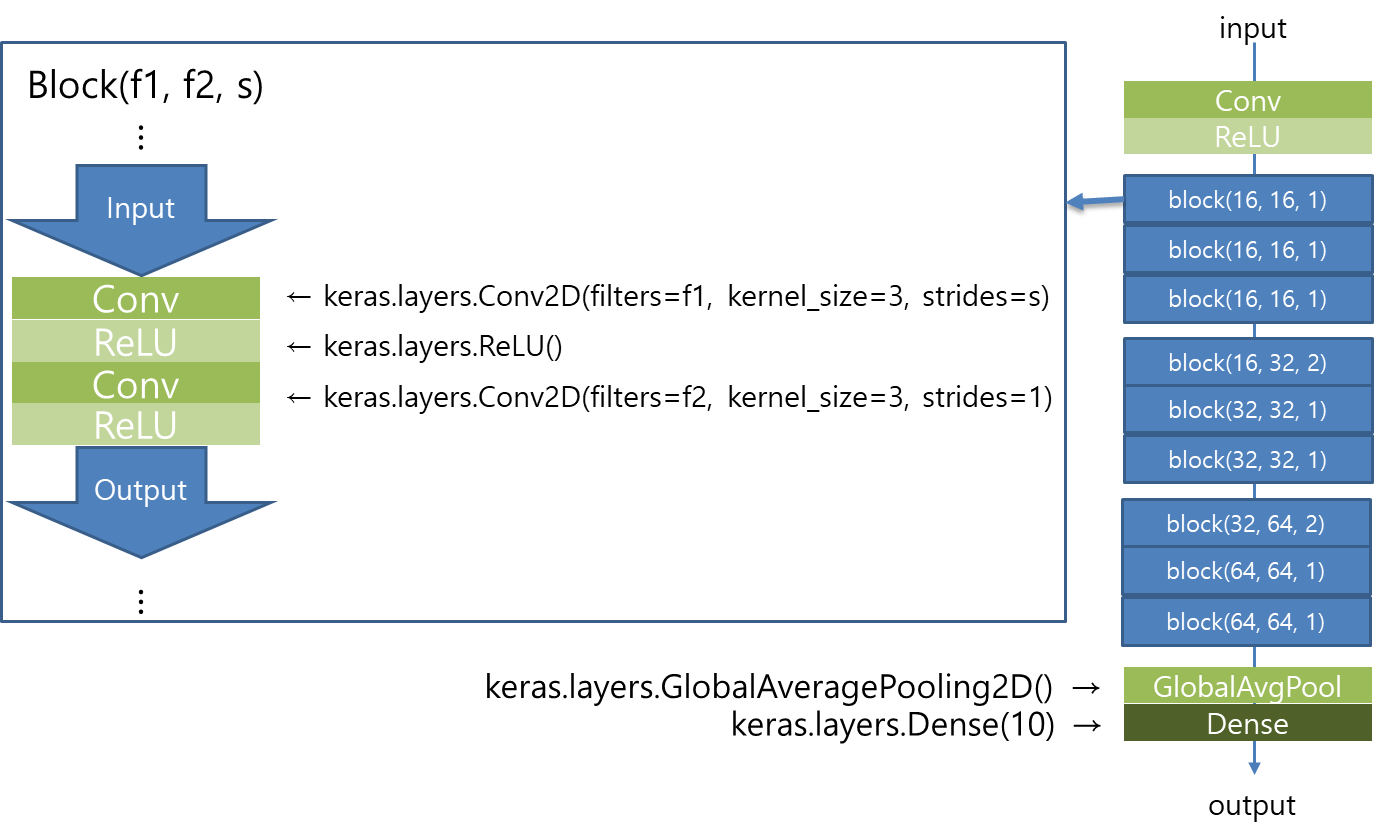

In [1]:
!pip install tensorflow-model-optimization

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

nb_classes = 10
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

train_y = keras.utils.to_categorical(train_y, nb_classes)
test_y = keras.utils.to_categorical(test_y, nb_classes)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Bacth normalization
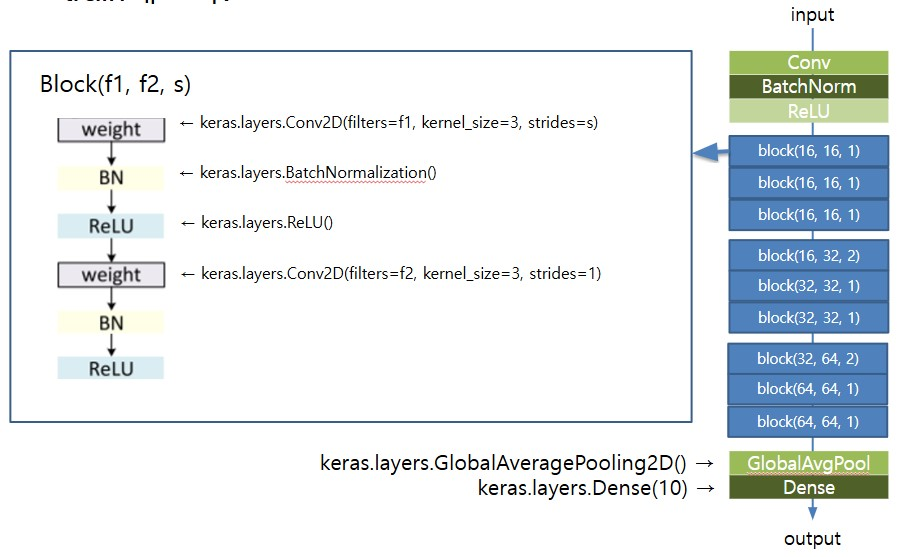

In [6]:
class Block(keras.layers.Layer):
  def __init__(self, f1, f2, s):
    super().__init__()
    kernel_initializer = 'he_normal'
    self.strides = s

    self.layers = keras.Sequential([
      layers.Conv2D(filters=f1, kernel_size=3, strides=s, padding='same', kernel_initializer=kernel_initializer),
      layers.ReLU(),
      layers.Conv2D(filters=f2, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
      layers.ReLU()
    ])

  def call(self, inputs):
    x = self.layers(inputs)
    return x

class Network(keras.Model):
  def __init__(self):
    super().__init__()
    self.kernel_initializer = 'he_normal'

  def build(self, input_shape): # automatically called when first __call__ invokes.
    self.first_layer = keras.Sequential([
      layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', kernel_initializer=self.kernel_initializer),
      layers.ReLU()
    ])

    self.block_layers = []
    # implement blocks here
    # use self.block_layers.append()
    # using for() can make code short
    filters_per_stage = [16, 32, 64]
    strides_of_first_block = [1, 2, 2]
    repeats_per_stage = [3, 3, 3]
    for filters, strides, repeats in zip(filters_per_stage, strides_of_first_block, repeats_per_stage):
      for _ in range(repeats):
        self.block_layers.append(Block(filters, filters, strides))
        strides = 1

    self.blocks = keras.Sequential(self.block_layers)

    self.last_layer = keras.Sequential([
      layers.GlobalAveragePooling2D(),
      layers.Flatten(),
      layers.Dense(10, kernel_initializer=self.kernel_initializer)
    ])

  def call(self, inputs): # automatically called in __call__ after build().
    x = self.first_layer(inputs)

    #implement blocks call here
    x = self.blocks(x)

    x = self.last_layer(x)

    return x

model = Network()
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.005),
              metrics=['accuracy'])

epoch = 7
batch_size = 128
model.fit(x=train_x, y=train_y, batch_size=batch_size, epochs=epoch, validation_data=(test_x, test_y))

print(model.summary())

Epoch 1/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.1003 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 2/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.1009 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 3/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.1006 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.0974 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 5/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.0963 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.0977 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 7/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.0960 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3028


Model: "network_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_24 (Sequential)      │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_18 (Block)                │ (None, 32, 32, 16)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_19 (Block)                │ (None, 32, 32, 16)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_20 (Block)                │ (None, 32, 32, 16)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_21 (Block)                │ (None, 16, 16, 32)     │        13,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_22 (Block)                │ (None, 16, 16, 32)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_23 (Block)                │ (None, 16, 16, 32)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_24 (Block)                │ (None, 8, 8, 64)       │        55,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_25 (Block)                │ (None, 8, 8, 64)       │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_26 (Block)                │ (None, 8, 8, 64)       │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_34 (Sequential)      │ (None, 8, 8, 64)       │       267,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_35 (Sequential)      │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807,104 (3.08 MB)

 Trainable params: 269,034 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,070 (2.05 MB)

None


##ResNet
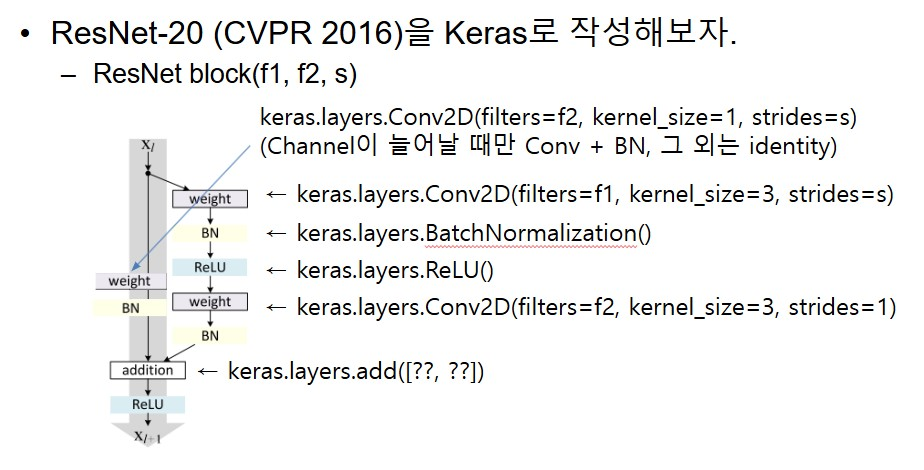

In [8]:
class ResNetBlock(keras.layers.Layer):
  def __init__(self, f1, f2, s):
    super().__init__()
    kernel_initializer = 'he_normal'
    self.strides = s

    self.residual = keras.Sequential([
      # implement here
      layers.Conv2D(filters=f1, kernel_size=3, strides=s, padding='same', kernel_initializer=kernel_initializer),
      layers.BatchNormalization(),
      layers.ReLU(),
      layers.Conv2D(filters=f2, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
      layers.BatchNormalization()
      #
    ])

    # layers.Identity()
    if s == 2:
      self.shortcut = keras.Sequential([
        # implement here
        layers.Conv2D(filters=f2, kernel_size=1, strides=s, padding='same', kernel_initializer=kernel_initializer),
        layers.BatchNormalization()
      ])
    else:
      self.shortcut = keras.Sequential([
        # implement here
        layers.Identity()
      ])

  def call(self, inputs):
    # implement here
    # add residual and shortcut
    shortcut = self.shortcut(inputs)
    x = self.residual(inputs)
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)

    return x

class ResNet(keras.Model):
  def __init__(self):
    super().__init__()
    self.kernel_initializer = 'he_normal'

  def build(self, input_shape): # automatically called when first __call__ invokes.
    self.first_layer = keras.Sequential([
      layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', kernel_initializer=self.kernel_initializer),
      layers.BatchNormalization(),
      layers.ReLU()
    ])

    self.block_layers = []
    # implement blocks here
    # use self.block_layers.append()
    # using for() can make code short
    filters_per_stage = [16, 32, 64]
    strides_of_first_block = [1, 2, 2]
    repeats_per_stage = [3, 3, 3]
    for filters, strides, repeats in zip(filters_per_stage, strides_of_first_block, repeats_per_stage):
      for _ in range(repeats):
        self.block_layers.append(ResNetBlock(filters, filters, strides))
        strides = 1

    self.blocks = keras.Sequential(self.block_layers)

    self.last_layer = keras.Sequential([
      layers.GlobalAveragePooling2D(),
      layers.Flatten(),
      layers.Dense(10, kernel_initializer=self.kernel_initializer)
    ])

  def call(self, inputs): # automatically called in __call__ after build().
    x = self.first_layer(inputs)

    #implement blocks call here
    x = self.blocks(x)

    x = self.last_layer(x)

    return x

model = ResNet()
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

epoch = 7
batch_size = 128
model.fit(x=train_x, y=train_y, batch_size=batch_size, epochs=epoch, validation_data=(test_x, test_y))

print(model.summary())


Epoch 1/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.2321 - loss: 2.1191 - val_accuracy: 0.4134 - val_loss: 1.5649
Epoch 2/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.4521 - loss: 1.4677 - val_accuracy: 0.4831 - val_loss: 1.4268
Epoch 3/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5278 - loss: 1.2880 - val_accuracy: 0.5762 - val_loss: 1.1600
Epoch 4/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5944 - loss: 1.1131 - val_accuracy: 0.6276 - val_loss: 1.0343
Epoch 5/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6486 - loss: 0.9749 - val_accuracy: 0.6450 - val_loss: 0.9870
Epoch 6/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6887 - loss: 0.8762 - val_accuracy: 0.6619 - val_loss: 0.9676
Epoch 7/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7192 - loss: 0.7955 - val_accuracy: 0.7004 - val_loss: 0.8502


Model: "res_net_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_48 (Sequential)      │ (None, 32, 32, 16)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block (ResNetBlock)     │ (None, 32, 32, 16)     │         4,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_1 (ResNetBlock)   │ (None, 32, 32, 16)     │         4,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_2 (ResNetBlock)   │ (None, 32, 32, 16)     │         4,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_3 (ResNetBlock)   │ (None, 16, 16, 32)     │        14,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_4 (ResNetBlock)   │ (None, 16, 16, 32)     │        18,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_5 (ResNetBlock)   │ (None, 16, 16, 32)     │        18,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_6 (ResNetBlock)   │ (None, 8, 8, 64)       │        58,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_7 (ResNetBlock)   │ (None, 8, 8, 64)       │        74,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_8 (ResNetBlock)   │ (None, 8, 8, 64)       │        74,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_67 (Sequential)      │ (None, 8, 8, 64)       │       273,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_68 (Sequential)      │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,344 (3.13 MB)

 Trainable params: 273,258 (1.04 MB)

 Non-trainable params: 1,568 (6.12 KB)

 Optimizer params: 546,518 (2.08 MB)

None
